In [1]:
import pandas as pd
import numpy as np

In [98]:
df = pd.read_csv('Data/Medium_AggregatedData.csv', sep=',')

In [84]:
df.shape

(279577, 50)

In [85]:
df = df[df['language']=='en']

In [86]:
df.groupby('postId').nunique()

,audioVersionDurationSec,codeBlock,codeBlockCount,collectionId,createdDate,createdDatetime,firstPublishedDate,firstPublishedDatetime,imageCount,isSubscriptionLocked,...,slug,name,postCount,author,bio,userId,userName,usersFollowedByCount,usersFollowedCount,scrappedDate
postId,,,,,,,,,,,,,,,,,,,,,
10007d3018fe,1,0,1,1,1,1,1,1,1,1,...,3,3,3,1,0,1,1,1,1,1
1000b3d0d2,1,0,1,1,1,1,1,1,1,1,...,4,4,4,1,0,1,1,1,1,1
1000c43bcb97,1,0,1,0,1,1,1,1,1,1,...,4,4,4,1,0,1,1,1,1,1
100139913e4c,1,0,1,0,1,1,1,1,1,1,...,4,4,4,1,1,1,1,1,1,1
1002a55eca89,1,0,1,1,1,1,1,1,1,1,...,5,5,5,1,0,1,1,1,1,1
10033db0a000,1,0,1,0,1,1,1,1,1,1,...,5,5,5,1,1,1,1,1,1,1
10034e4cf9a,1,0,1,1,1,1,1,1,1,1,...,5,5,5,1,1,1,1,1,1,1
100385c6dfe0,1,0,1,1,1,1,1,1,1,1,...,3,3,3,1,1,1,1,1,1,1
1003ff48854,1,0,1,0,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1


In [87]:
df_drop_duplicate = df.drop_duplicates(subset='postId')

In [88]:
df_drop_duplicate.describe()

,audioVersionDurationSec,codeBlockCount,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,socialRecommendsCount,tagsCount,totalClapCount,wordCount,publicationfollowerCount,postCount,usersFollowedByCount,usersFollowedCount,scrappedDate
count,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,0.0,66380.000000,66380.000000,66380.000000,66380.0
mean,0.539500,1.195556,3.550136,6.606478,3.983713,25.196113,0.902757,0.069931,4.299940,173.135026,922.495089,NaN,60063.094908,1776.915954,297.812654,20181104.0
std,23.172471,6.950389,5.399172,11.746137,3.506808,277.391004,14.940658,0.292918,1.203037,1891.890063,871.067923,NaN,61242.502841,13029.953176,1578.240970,0.0
min,0.000000,0.000000,0.000000,0.000000,0.003774,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,20181104.0
25%,0.000000,0.000000,1.000000,1.000000,1.920755,0.000000,0.000000,0.000000,4.000000,0.000000,421.000000,NaN,30322.000000,8.000000,3.000000,20181104.0
50%,0.000000,0.000000,2.000000,4.000000,3.180189,2.000000,0.000000,0.000000,5.000000,6.000000,720.000000,NaN,51320.000000,53.000000,22.000000,20181104.0
75%,0.000000,0.000000,4.000000,8.000000,5.011557,8.000000,0.000000,0.000000,5.000000,65.000000,1158.000000,NaN,66154.000000,324.000000,127.000000,20181104.0
max,3266.000000,389.000000,263.000000,1180.000000,99.603774,42288.000000,3076.000000,3.000000,6.000000,291706.000000,24964.000000,NaN,331914.000000,333655.000000,85867.000000,20181104.0


In [9]:
df_drop_duplicate.to_csv('Data/dropduplicate.csv', sep=',')

In [63]:
df_dummy = df_drop_duplicate.head(3)

In [64]:
df_dummy

,audioVersionDurationSec,codeBlock,codeBlockCount,collectionId,createdDate,createdDatetime,firstPublishedDate,firstPublishedDatetime,imageCount,isSubscriptionLocked,...,slug,name,postCount,author,bio,userId,userName,usersFollowedByCount,usersFollowedCount,scrappedDate
0,0,NaN,0.0,638f418c8464,2018-09-18,2018-09-18 20:55:34,2018-09-18,2018-09-18 20:57:03,1,False,...,blockchain,Blockchain,265164.0,Anar Babaev,NaN,f1ad85af0169,babaevanar,450.0,404.0,20181104
3,0,NaN,0.0,NaN,2018-01-07,2018-01-07 17:04:37,2018-01-07,2018-01-07 17:06:29,13,False,...,technology,Technology,166125.0,George Sykes,NaN,93b9e94f08ca,tasty231,6.0,22.0,20181104
7,0,NaN,0.0,NaN,2018-03-08,2018-03-08 07:04:31,2018-03-08,2018-03-08 07:07:42,1,False,...,data-science,Data Science,33617.0,tech data,Tech data Providing Courses Like SaS Training ...,60a3bfd83742,techdatasolutions18,4.0,1.0,20181104


In [89]:
df_dummy.to_csv('Data/shortdummy.csv',sep=',')

In [90]:
tag = df.groupby('tag_name').size().sort_values(ascending=False)[:10]
top = list(tag.index)
value = list(tag.values)

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

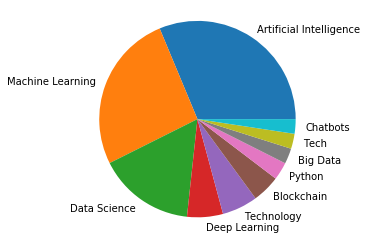

In [92]:
plt.pie(value, labels=top)
plt.axis('equal')
plt.show()

In [93]:
tag

tag_name
Artificial Intelligence    32824
Machine Learning           27383
Data Science               16689
Deep Learning               6194
Technology                  6163
Blockchain                  4801
Python                      3075
Big Data                    2670
Tech                        2599
Chatbots                    2515
dtype: int64

In [94]:
df[df['postId']=='100139913e4c'].to_csv('Data/same2.csv',sep=',')

In [95]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [96]:
text = ""
for ind, row in df_drop_duplicate.iterrows():
    text += str(row["title"]) + " "
text = text.strip()

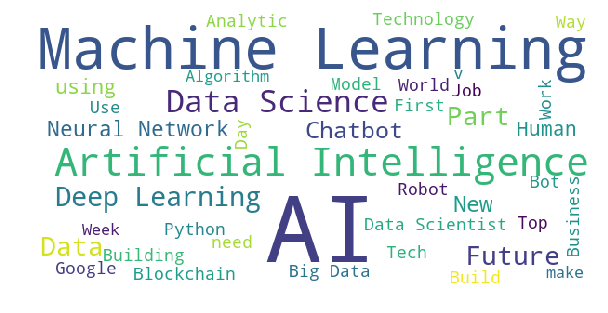

In [97]:
plt.figure(figsize=(10,8))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=100, max_words=40).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()